# Project Part III: Machine learning

### Team Members

Xiao Dong dongxiao@umich.edu (dongxiao)

Zezhen Wang zezhenw@umich.edu (zezhenw)

Lingxiao Zhong zhonglx@umich.edu (zhonglx)

## Preprocessing Data

In [1]:
#### VIN Acquired from https://en.wikibooks.org/wiki/Vehicle_Identification_Numbers_(VIN_codes)

#Alpha Romeo: Does not exist

#Fiat: Does not match

# Mercedes-Benz: Too much spec, too little data, ignore

def decode_vin(row):
    vin = row['VIN (1-10)']
    if len(vin) < 8:
        return "None"  # VIN too short to decode
    
    # Ford: position 8:
    # M/4: 200 SR RWD
    # S/5: 284 SR AWD
    # 7: 64 ER RWD
    # U: 150 ER AWD
    # E: 227 GT
    if row['Make'] == 'FORD':
        position = 8  # Ford uses position 8
        char = vin[position - 1]  # Adjust for 0-based indexing
        ford_mapping = {
            'M': '200',
            '4': '200',
            'S': '284',
            '5': '284',
            '7': '64',
            'U': '150',
            'E': '227'
        }
        return ford_mapping.get(char, "None")
    
    # HYUNDAI
    # IONIQ 5 N: direct match
    # IONIQ 5: pos 8
    # B: 79 RWD 22- 58kWh
    # E: 51 RWD 22- 77kWh
    # F: 77 AWD 22- 77kWh
    # IONIQ 6: pos 8
    # A: 50 RWD 23- 77kWh
    # B: 112 RWD 23- 53kWh
    # C: 68 AWD 23- 77kWh
    # KONA: pos 8
    # 6: 19 (Kona 65kWh)
    # 7: 137 (Kona 48kWh)
    # G: drop
    elif row['Make'] == 'HYUNDAI':
        position = 8
        char = vin[position - 1]
        if row['Model'] == 'Ioniq 5':
            hyundai_mapping = {
                'B': '79',
                'E': '51',
                'F': '77'
            }
            return hyundai_mapping.get(char, "None")
        elif row['Model'] == 'Ioniq 6':
            hyundai_mapping = {
                'A': '50',
                'B': '112',
                'C': '68'
            }
            return hyundai_mapping.get(char, "None")
        elif row['Model'] == 'Kona Electric':
            hyundai_mapping = {
                '6': '19',
                '7': '137'
            }
            return hyundai_mapping.get(char, "None")
        

    # GENESIS
    # GV60: pos 8
    # A: 221 Premium
    # C: 323 Sport
    # B: 342 Sport Plus
    # GV70: pos 8
    # B/C: 281
    elif row['Make'] == 'GENESIS':
        position = 8
        char = vin[position - 1]
        if row['Model'] == 'GV60':
            genesis_mapping = {
                'A': '221',
                'C': '323',
                'B': '342'
            }
            return genesis_mapping.get(char, "None")
        elif row['Model'] == 'GV70':
            genesis_mapping = {
                'B': '281',
                'C': '281'
            }
            return genesis_mapping.get(char, "None")
        elif row['Model'] == 'GV80':
            return '272'
        
    # KIA
    # EV6: pos 8
    # A: 41 LR 2WD
    # B: 156 SR 2WD
    # C: 84 LR AWD
    # E: 69 GT
    # Niro: pos 8
    # 1/G: 18 Niro EV
    # EV9: pos 8
    # 1: 130 99.8kWh RWD
    # 5: 60 99.8kWh AWD
    elif row['Make'] == 'KIA':
        position = 8
        char = vin[position - 1]
        if row['Model'] == 'EV6':
            kia_mapping = {
                'A': '41',
                'B': '156',
                'C': '84',
                'E': '69'
            }
            return kia_mapping.get(char, "None")
        elif row['Model'] == 'Niro':
            kia_mapping = {
                '1': '18',
                'G': '18'
            }
            return kia_mapping.get(char, "None")
        elif row['Model'] == 'EV9':
            kia_mapping = {
                '1': '130',
                '5': '60'
            }
            return kia_mapping.get(char, "None")
        
    # NISSAN
    # Ariya: pos 4
    # A: 181 63kWh
    # B: 63 87kWh
    # C/D: 253
    # Leaf: pos 4
    # A: 45 Leaf
    # B/C: 144 Leaf e+
    elif row['Make'] == 'NISSAN':
        position = 4
        char = vin[position - 1]
        if row['Model'] == 'ARIYA':
            nissan_mapping = {
                'A': '181',
                'B': '63',
                'C': '253',
                'D': '253'
            }
            return nissan_mapping.get(char, "None")
        elif row['Model'] == 'Leaf':
            nissan_mapping = {
                'A': '45',
                'B': '144',
                'C': '144'
            }
            return nissan_mapping.get(char, "None")
    # Toyota
    # bZ4X: pos 5
    # A: 36 FWD
    # B: 115 AWD
    elif row['Make'] == 'TOYOTA':
        position = 5
        char = vin[position - 1]
        if row['Model'] == 'bZ4X':
            toyota_mapping = {
                'A': '36',
                'B': '115'
            }
            return toyota_mapping.get(char, "None")
        
    # Tesla
    # Model Y: pos 8
    # D: 5 LR RWD
    # E: 3 LR Dual Motor
    # F: 9 Performance
    # Model 3: pos 8
    # A: does not have value in cars_data_cleaned, drop
    # B: 4 LR Dual Motor
    # T: 20 Performance
    # Model S: pos 8
    # 5: 17 Dual Motor
    # 6: 16 Plaid
    # Model X: pos 8
    # 5: 91 Dual Motor
    # 6: 126 Plaid
    elif row['Make'] == 'TESLA':
        position = 8
        char = vin[position - 1]
        if row['Model'] == 'Model Y':
            tesla_mapping = {
                'D': '5',
                'E': '3',
                'F': '9'
            }
            return tesla_mapping.get(char, "None")
        elif row['Model'] == 'Model 3':
            tesla_mapping = {
                'A': "None",
                'B': '4',
                'T': '20'
            }
            return tesla_mapping.get(char, "None")
        elif row['Model'] == 'Model S':
            tesla_mapping = {
                '5': '17',
                '6': '16'
            }
            return tesla_mapping.get(char, "None")
        elif row['Model'] == 'Model X':
            tesla_mapping = {
                '5': '91',
                '6': '126'
            }
            return tesla_mapping.get(char, "None")
    else:
        return "None"

In [2]:
import pandas as pd

car_data = pd.read_csv('cars_data_cleaned.csv')
wa_purchase = pd.read_csv('EV_POP_2024_BAT.csv')

In [3]:
# apply the decode_vin to the wa_purchase DataFrame, fill anything else with "None"
wa_purchase['match_id'] = wa_purchase.apply(decode_vin, axis=1)
wa_purchase['match_id'] = wa_purchase['match_id'].fillna("None")
# keep only integer match_id, for later merge with Row_ID
wa_purchase['match_id'] = wa_purchase['match_id'].astype(str).str.extract(r'(\d+)')
# convert to int
wa_purchase['match_id'] = wa_purchase['match_id'].astype('Int64')

In [4]:
car_df = pd.merge(wa_purchase, car_data, how='inner', left_on='match_id', right_on='Row_ID')
car_df = car_df.drop(columns=['Row_ID'])
car_df

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model_x,Primary Use,Electric Range,Odometer Reading,Odometer Reading Description,...,Efficiency,Fastcharge,Germany_price_before_incentives,Netherlands_price_before_incentives,UK_price_after_incentives,Drive_Configuration,Tow_Hitch,Towing_capacity_in_kg,Number_of_seats,Estimated_US_Value
0,Battery Electric Vehicle (BEV),5YJSA1E6XR,267352214,2024,TESLA,Model S,Passenger,0.0,15,Actual Mileage,...,170,780,110970,108990,100000,All Wheel Drive,Towbar possible,1600,5,124600
1,Battery Electric Vehicle (BEV),5YJ3E1EB3R,274952660,2024,TESLA,Model 3,Passenger,0.0,15,Actual Mileage,...,150,770,50970,49990,49990,All Wheel Drive,Towbar possible,1000,5,62287
2,Battery Electric Vehicle (BEV),5YJ3E1EB3R,265716251,2024,TESLA,Model 3,Passenger,0.0,15,Actual Mileage,...,150,770,50970,49990,49990,All Wheel Drive,Towbar possible,1000,5,62287
3,Battery Electric Vehicle (BEV),5YJ3E1ET0R,267127430,2024,TESLA,Model 3,Passenger,0.0,15,Actual Mileage,...,165,700,57970,56990,59990,All Wheel Drive,Towbar not possible,0,5,74747
4,Battery Electric Vehicle (BEV),7SAYGDEE9R,273783821,2024,TESLA,Model Y,Passenger,0.0,15,Actual Mileage,...,172,670,55970,52990,52990,All Wheel Drive,Towbar possible,1600,5,66025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22927,Battery Electric Vehicle (BEV),KNDC4DLC6R,274967262,2024,KIA,EV6,Passenger,0.0,14,Actual Mileage,...,185,1050,55980,59995,51745,All Wheel Drive,Towbar possible,1600,5,64474
22928,Battery Electric Vehicle (BEV),KNDC3DLC4R,276394856,2024,KIA,EV6,Passenger,0.0,15,Actual Mileage,...,185,1050,55980,59995,51745,All Wheel Drive,Towbar possible,1600,5,64474
22929,Battery Electric Vehicle (BEV),3FMTK3SU7R,278655982,2024,FORD,Mustang Mach-E,Passenger,0.0,34,Actual Mileage,...,204,390,65900,66940,65405,All Wheel Drive,Towbar possible,1500,5,81494
22930,Battery Electric Vehicle (BEV),1FT6W3L76R,274723592,2024,FORD,F-150,Truck,0.0,32,Actual Mileage,...,190,420,58500,54400,59830,Rear Wheel Drive,Towbar possible,1500,5,74548


In [5]:
car_df.columns

Index(['Clean Alternative Fuel Vehicle Type', 'VIN (1-10)', 'DOL Vehicle ID',
       'Model Year', 'Make', 'Model_x', 'Primary Use', 'Electric Range',
       'Odometer Reading', 'Odometer Reading Description',
       'New or Used Vehicle', 'Sale Price', 'Sale Date', 'Base MSRP',
       'Transaction Type', 'Transaction Date', 'Year', 'County', 'City',
       'State', 'Postal Code',
       '2019 HB 2042: Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Meets 2019 HB 2042 Electric Range Requirement',
       'Meets 2019 HB 2042 Sale Date Requirement',
       'Meets 2019 HB 2042 Sale Price/Value Requirement',
       '2019 HB 2042: Battery Range Requirement',
       '2019 HB 2042: Purchase Date Requirement',
       '2019 HB 2042: Sale Price/Value Requirement',
       'Electric Vehicle Fee Paid', 'Transportation Electrification Fee Paid',
       'Hybrid Vehicle Electrification Fee Paid', '2020 GEOID',
       'Legislative District', 'Electric Utility', 'match_id', 'Brand',
       'M

In [6]:
car_df['Sale Price']

0        96130
1        51130
2        59880
3        54630
4        49630
         ...  
22927    58445
22928    54100
22929    61480
22930    69185
22931    41948
Name: Sale Price, Length: 22932, dtype: int64

In [7]:
car_df['Estimated_US_Value']

0        124600
1         62287
2         62287
3         74747
4         66025
          ...  
22927     64474
22928     64474
22929     81494
22930     74548
22931     62854
Name: Estimated_US_Value, Length: 22932, dtype: int64

#### Check Null Values

In [8]:
# Check null values
car_df.isnull().sum().sort_values(ascending=False)

Legislative District                                               17
City                                                                1
Clean Alternative Fuel Vehicle Type                                 0
2019 HB 2042: Sale Price/Value Requirement                          0
Transportation Electrification Fee Paid                             0
Hybrid Vehicle Electrification Fee Paid                             0
2020 GEOID                                                          0
Electric Utility                                                    0
match_id                                                            0
Brand                                                               0
Model_y                                                             0
Battery                                                             0
km_of_range                                                         0
0-100                                                               0
Top_Speed           

It seems only Legislative District and City have null values, and they will not affect machine learning process, so we decided not to deal with these null values

#### Remove outliers

In [9]:
def remove_outliers_percentile(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower = df[column].quantile(lower_percentile)
    upper = df[column].quantile(upper_percentile)
    print(f"{column} range kept: {lower:.2f} ~ {upper:.2f}")
    print(f"Number of outliers removed: {(df[column] < lower).sum() + (df[column] > upper).sum()}")
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Re-load original merged dataset here if needed (to undo previous drop)
# Apply new outlier filter
car_df = remove_outliers_percentile(car_df, 'Estimated_US_Value')
car_df = remove_outliers_percentile(car_df, 'Odometer Reading')
print(f"Final shape after outlier removal: {car_df.shape}")


Estimated_US_Value range kept: 27927.00 ~ 130830.00
Number of outliers removed: 162
Odometer Reading range kept: 5.00 ~ 1063.93
Number of outliers removed: 365
Final shape after outlier removal: (22405, 52)


Outliers were originally removed using the IQR method. However, this eliminated over 50% of the dataset, and this is probably because of the narrow range of values. Because the IQR method filtered too many data, and it may lose valuable variation, we decided to apply a more conservative approach using the 1st and 99th percentiles.

This strategy retains the majority of the data while still removing extreme anomalies that might distort distance-based clustering results.

#### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

# Select only numeric features for clustering
# Change to negative because '0-100' is better when they are smaller, while the bigger the other features, the better
# Change to negative make it also the bigger the better
car_df['0-100'] = -car_df['0-100']
numeric_features = [ 'Odometer Reading', 'Efficiency', 'Fastcharge', 'Sale Price', 'Battery', 'km_of_range', '0-100', 'Top_Speed']
X = car_df[numeric_features]

# Standardize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

'Estimated_US_Value', 'Odometer Reading', 'Efficiency', and 'Fastcharge', 'Sale Price', 'Battery', 'km_of_range', '0-100', 'Top_Speed' were selected for clustering because they represent vehicle pricing and other important aspects, which are core aspects for EV models.
We standardized these columns in this step.

#### PCA

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_

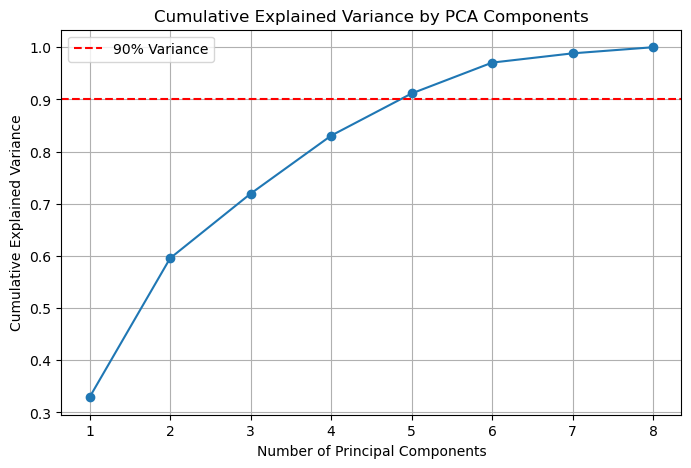

In [12]:
import numpy as np

cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
# PCA with 5 components
pca_final = PCA(n_components=5)
X_pca = pca_final.fit_transform(X_scaled)


print("Explained variance ratios:", pca_final.explained_variance_ratio_)
print("Cumulative variance:", sum(pca_final.explained_variance_ratio_))

Explained variance ratios: [0.32908516 0.26638503 0.12381926 0.11123897 0.080849  ]
Cumulative variance: 0.9113774186617369


## Clustering

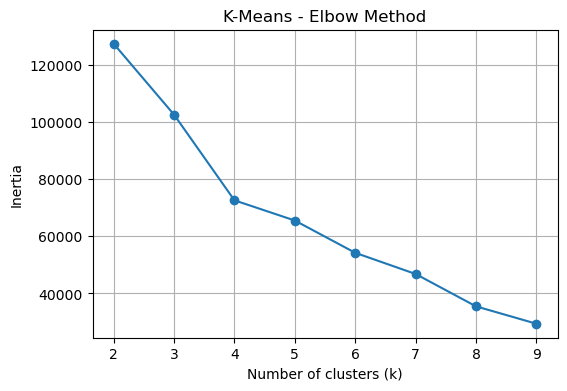

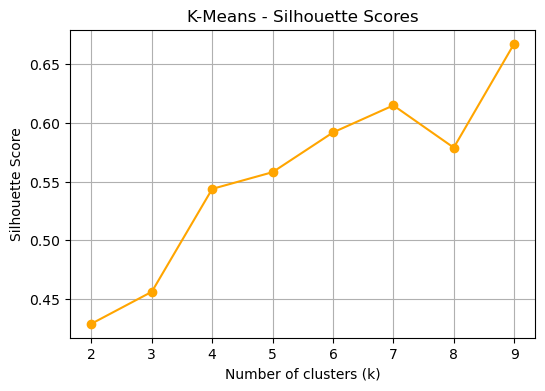

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different k values
k_range = range(2, 10)
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_pca, labels))

# Plot elbow curve
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('K-Means - Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plot silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('K-Means - Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

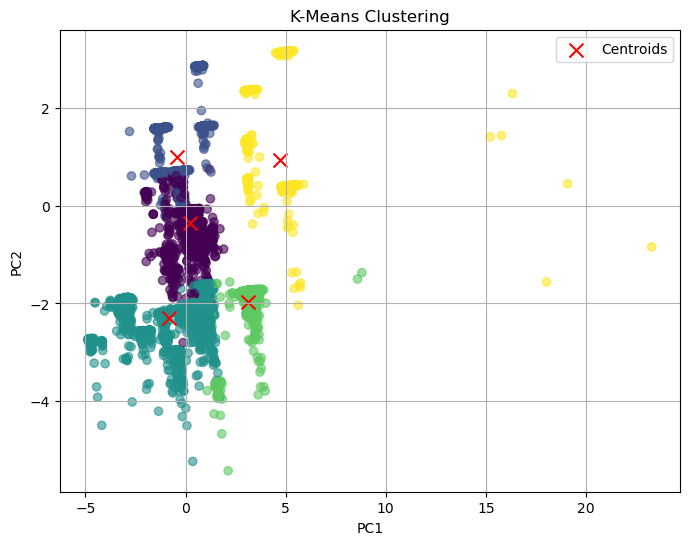

In [15]:
# Final KMeans with 5
k_final = 5
kmeans = KMeans(n_clusters=k_final, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

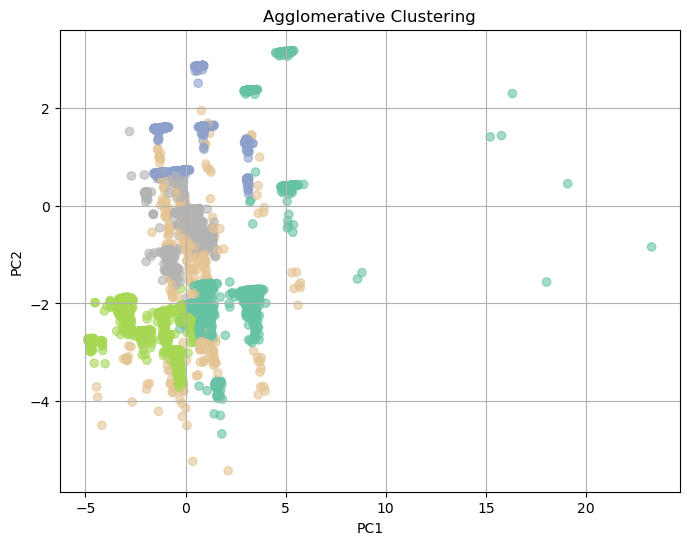

In [16]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative clustering with k=5
agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X_pca)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='Set2', alpha=0.6)
plt.title('Agglomerative Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

In [17]:
# Change '0-100' back.
car_df['0-100'] = -car_df['0-100']
car_df['cluster_label'] = cluster_labels

cluster_summary = car_df.groupby('cluster_label')[numeric_features].mean()
pd.set_option('display.max_columns', None)
display(cluster_summary)

,Odometer Reading,Efficiency,Fastcharge,Sale Price,Battery,km_of_range,0-100,Top_Speed
cluster_label,,,,,,,,
0,69.328034,185.604708,1032.314277,53206.226536,74.051055,145.734332,5.399419,186.106084
1,16.513456,169.026047,684.311457,51114.267784,75.000000,127.555634,4.805052,219.978203
2,51.032733,191.574702,414.987141,48888.811316,75.066869,141.267945,6.867594,172.326163
3,58.330113,219.922705,822.149758,71961.446055,95.834783,168.483897,6.207085,198.751208
4,34.920617,191.848953,711.334068,87868.949283,93.610805,211.736494,3.652591,252.101433


In [18]:
car_df["PC1"] = X_pca[:, 0]
car_df["PC2"] = X_pca[:, 1]

In [19]:
# %pip install altair

In [20]:
import altair as alt

cluster_select = alt.selection_point(
    name="SelectCluster",
    fields=["cluster_label"],
    bind=alt.binding_radio(options=sorted(car_df['cluster_label'].unique().tolist()), name="Cluster: "),
    value=0
)

base = alt.Chart(car_df)

color_condition = alt.condition(
    f"datum.cluster_label == {cluster_select.name}.cluster_label",
    alt.Color("Brand:N", legend=alt.Legend(title="Brand")),
    alt.value("lightgrey")
)

scatter = base.mark_circle(
    size=60,
    filled=True
).encode(
    x=alt.X("PC1:Q"),
    y=alt.Y("PC2:Q"),
).encode(
    color=color_condition,
    tooltip=["cluster_label", "Brand"] + numeric_features,
).add_params(
    cluster_select
).properties(
    width=500,
    height=400
)

numeric_tooltips = [
    alt.Tooltip(f"{col}:Q", aggregate="average", title=f"Avg {col}")
    for col in numeric_features
]

bar = base.transform_filter(
    cluster_select
).mark_bar().encode(
    x=alt.X("Brand:N", title="Brand"),
    y=alt.Y("count():Q", title="Count"),
    tooltip=[alt.Tooltip("Brand:N"), alt.Tooltip("count():Q")] + numeric_tooltips,
    color=alt.Color("Brand:N", legend=None)
).properties(
    width=500,
    height=200
)

chart = alt.vconcat(scatter, bar).resolve_scale(color="shared")

chart.save("chart.html")

In [21]:
# Altair seems to have problem handle over 5000 rows and display directly in notebook
# So first saved to html and render here
from IPython.display import IFrame

# If this is not working, please refer to the HTML file directly for the interactive visualization
IFrame(src='./chart.html', width=1000, height=1000)

Among the five clusters, Cluster 1 is the largest, containing over 12,000 cars—all of which are Teslas. This underscores Tesla’s dominant position in the EV industry. Kia appears to follow closely behind, leading Cluster 3 and sharing prominence with Hyundai in Cluster 0. Cluster 2 seems to represent lower-end EVs, as it scores low on both PC1 and PC2. Here, brands other than Tesla are competing intensely, with Ford emerging as the leader. Cluster 4 is also led by Tesla.

Overall, the analysis clearly shows that Tesla leads the EV market, while Kia and Hyundai have also carved out their uniquedistinct positions. Other brands are competing fiercely in what may be a more budget-conscious segment, with Ford currently at the forefront.

Given more time, we believe the analysis could be deepened by examining each principal component in detail to better understand how Tesla, Kia, and Hyundai differentiate themselves. However, due to time constraints, we have decided to conclude our analysis here.